Customer_id of female(in Customer_id dataset == df2 ) is missing in Transaction_ID dataset(df3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame,Series


In [2]:
df1=pd.read_csv('Cab_Data.csv')
df2=pd.read_csv('Customer_ID.csv')
df3=pd.read_csv('Transaction_ID.csv')
df4=pd.read_csv('City.csv')


# df1 - Cab_Data analysis

In [3]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08 January 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06 January 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02 January 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07 January 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03 January 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
df1['price charged per km'] = df1['Price Charged']/df1['KM Travelled']

# df2- Customer ID Analysis

In [5]:
df2.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
df2.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


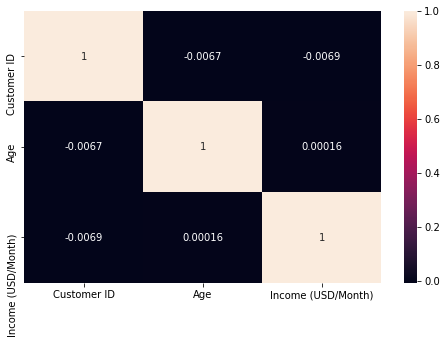

In [7]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [8]:
df2['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

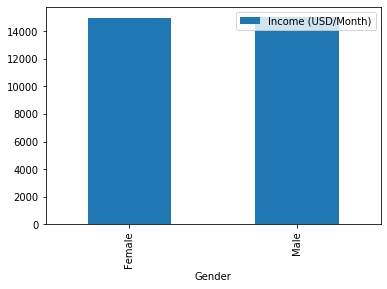

In [9]:
df2[['Gender','Income (USD/Month)']].groupby('Gender').mean().plot(kind='bar')
plt.show()

In [10]:
#df2[['Gender',]].groupby('Gender').mean().plot(kind='bar')
# plt.show()

From the above graph we can conclude that number of male passengers are more than female,but as we compare between age and 
income we can conclude that at an average females are more older than male and their average income is slightly higher than
their male counterpart.

# df3 --- Transaction ID 

In [11]:
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
df3.shape

(1999, 3)

In [13]:
df3.describe()

,Transaction ID,Customer ID
count,1.999000e+03,1999.000000
mean,1.000101e+07,24752.639820
std,5.772059e+02,20574.918237
min,1.000001e+07,8.000000
25%,1.000051e+07,4775.500000
50%,1.000101e+07,19699.000000
75%,1.000151e+07,43786.500000
max,1.000201e+07,59965.000000


In [14]:
df3['Payment_Mode'].value_counts()

Card    1164
Cash     835
Name: Payment_Mode, dtype: int64

# df4 

In [15]:
df4.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [16]:
df4.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,LOS ANGELES CA,"1,339,155","69,995"
freq,1,1,1


# merging df1 and df3 

In [17]:
merge1 = pd.merge(df1,df3,on='Transaction ID',how='inner')
merge1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,price charged per km,Customer ID,Payment_Mode
0,10000011,08 January 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,12.182266,29290,Card
1,10000012,06 January 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,12.526904,27703,Card
2,10000013,02 January 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,13.849558,28712,Cash
3,10000014,07 January 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,11.377751,28020,Cash
4,10000015,03 January 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,13.129439,27182,Card
5,10000016,07 January 2016,Pink Cab,ATLANTA GA,6.06,72.43,63.0240,11.952145,27318,Cash
6,10000017,03 January 2016,Pink Cab,AUSTIN TX,44.00,576.15,475.2000,13.094318,33788,Card
7,10000018,07 January 2016,Pink Cab,AUSTIN TX,35.65,466.10,377.8900,13.074334,34106,Card
8,10000019,12 January 2016,Pink Cab,BOSTON MA,14.40,191.61,146.8800,13.306250,59799,Cash
9,10000020,06 January 2016,Pink Cab,BOSTON MA,10.89,156.98,113.2560,14.415060,57982,Cash


# Merging merge1 and df2

In [18]:
fm = pd.merge(merge1,df2,on='Customer ID',how='inner')
fm


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,price charged per km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08 January 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,12.182266,29290,Card,Male,28,10813
1,10000012,06 January 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,12.526904,27703,Card,Male,27,9237
2,10000013,02 January 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,13.849558,28712,Cash,Male,53,11242
3,10000014,07 January 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,11.377751,28020,Cash,Male,23,23327
4,10000015,03 January 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,13.129439,27182,Card,Male,33,8536
5,10000016,07 January 2016,Pink Cab,ATLANTA GA,6.06,72.43,63.0240,11.952145,27318,Cash,Male,25,13984
6,10000017,03 January 2016,Pink Cab,AUSTIN TX,44.00,576.15,475.2000,13.094318,33788,Card,Male,23,23788
7,10000018,07 January 2016,Pink Cab,AUSTIN TX,35.65,466.10,377.8900,13.074334,34106,Card,Male,19,19980
8,10000019,12 January 2016,Pink Cab,BOSTON MA,14.40,191.61,146.8800,13.306250,59799,Cash,Male,33,19271
9,10000020,06 January 2016,Pink Cab,BOSTON MA,10.89,156.98,113.2560,14.415060,57982,Cash,Male,57,5068


In [19]:
fm['profit percentage per trip'] = (((fm['Price Charged']-fm['Cost of Trip'])/fm['Cost of Trip'])*100).round(2)
fm['profit percentage per trip']

0        18.27
1         7.07
2        28.24
3         7.34
4        17.23
5        14.92
6        21.24
7        23.34
8        30.45
9        38.61
10       20.12
11       44.10
12       17.57
13       20.13
14       20.83
15       38.61
16       32.58
17       22.30
18       43.33
19       42.21
20       33.38
21       33.47
22       29.94
23       13.63
24       42.50
25       66.96
26        7.28
27       77.59
28       32.85
29       11.36
         ...  
1528     98.76
1529     45.74
1530     45.21
1531     76.10
1532    100.94
1533     50.95
1534     63.64
1535     56.37
1536     63.41
1537     67.65
1538     51.17
1539     62.80
1540     76.10
1541     81.33
1542     44.66
1543     63.65
1544     62.01
1545     94.49
1546     39.03
1547     47.01
1548     66.99
1549     66.31
1550    102.37
1551     71.16
1552     77.80
1553     67.02
1554     81.59
1555    107.95
1556     56.53
1557     82.67
Name: profit percentage per trip, Length: 1558, dtype: float64

In [20]:
fm.shape

(1558, 14)

In [21]:
fm['Company'].value_counts()

Yellow Cab    1104
Pink Cab       454
Name: Company, dtype: int64

In [22]:
fm.isnull().sum()

Transaction ID                0
Date of Travel                0
Company                       0
City                          0
KM Travelled                  0
Price Charged                 0
Cost of Trip                  0
price charged per km          0
Customer ID                   0
Payment_Mode                  0
Gender                        0
Age                           0
Income (USD/Month)            0
profit percentage per trip    0
dtype: int64

In [23]:
fm.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,price charged per km,Customer ID,Age,Income (USD/Month),profit percentage per trip
count,1.558000e+03,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,1.000101e+07,22.637599,478.152125,284.634846,20.978913,19444.908216,34.886393,14872.437099,65.991091
std,5.833350e+02,12.278440,303.512623,157.573756,5.800960,20377.418986,12.668717,7953.293530,40.333106
min,1.000001e+07,1.900000,22.200000,19.380000,7.297959,8.000000,18.000000,2035.000000,-34.930000
25%,1.000054e+07,12.100000,227.190000,149.870500,17.202313,3975.250000,24.000000,8145.250000,39.112500
50%,1.000093e+07,22.400000,440.085000,280.119000,20.845687,7631.500000,32.000000,14635.500000,63.100000
75%,1.000148e+07,32.995000,687.887500,417.469000,24.686693,33780.000000,41.000000,20797.250000,90.390000
max,1.000201e+07,47.600000,1544.450000,662.688000,39.527557,59965.000000,65.000000,34968.000000,202.360000


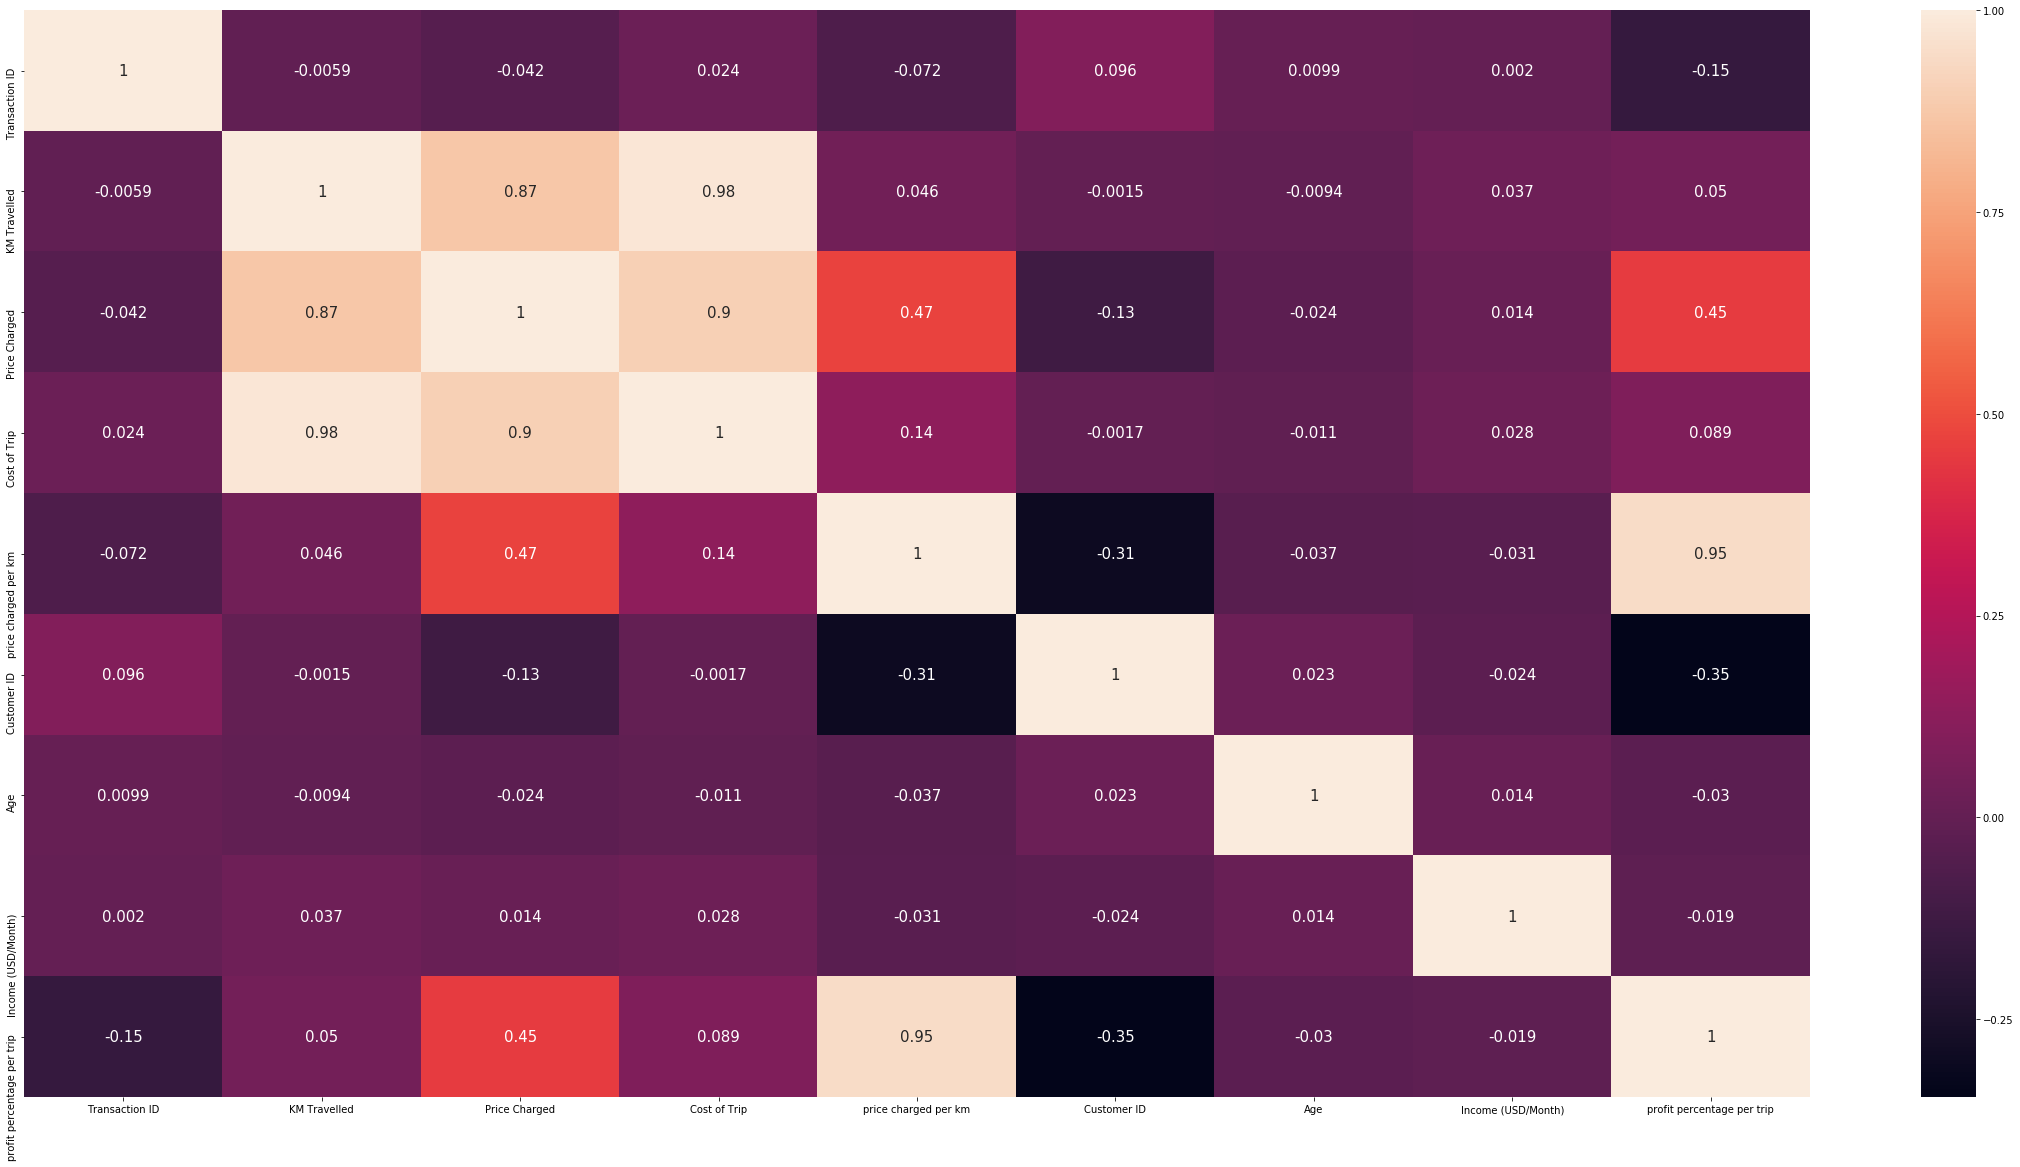

In [24]:
plt.figure(figsize=(40,20))
sns.heatmap(fm.corr(),annot=True,annot_kws={'size': 15})
plt.show()

In [25]:
pd.crosstab(index=fm['City'],columns=fm['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


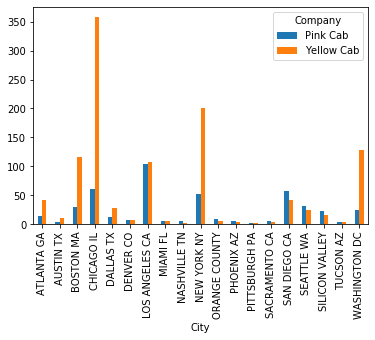

In [26]:
pd.crosstab(index=fm['City'],columns=fm['Company']).plot(kind='bar')
plt.show()

From the above observation we can conclude that the demand of yellow cab is more in allmost all the cities.

In [27]:
pd.crosstab(index=fm['Payment_Mode'],columns=fm['Company'],margins=True)


Company,Pink Cab,Yellow Cab,All
Payment_Mode,,,
Card,258,656,914
Cash,196,448,644
All,454,1104,1558


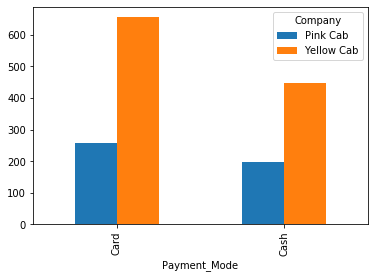

In [28]:
pd.crosstab(index=fm['Payment_Mode'],columns=fm['Company']).plot(kind='bar')
plt.show()

In [29]:
fm['price charged per km'] = fm['Price Charged']/fm['KM Travelled']

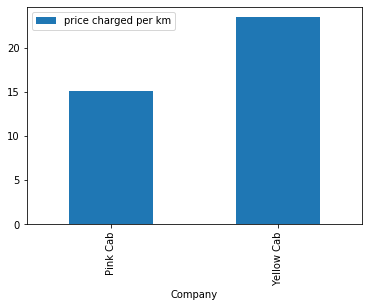

In [30]:
fm[['price charged per km','Company']].groupby('Company').mean().plot(kind='bar')
plt.show()

From the above graph we can conclude that Yellow cab is costlier than Pink Cab

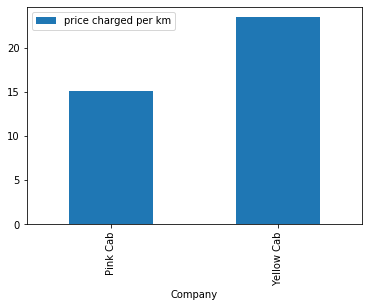

In [31]:
fm[['price charged per km','Company']].groupby('Company').mean().plot(kind='bar')
plt.show()

In [32]:
fm['Gender'].value_counts()

Male    1558
Name: Gender, dtype: int64

In [33]:
pd.crosstab(fm['Age'],fm['Company'])

Company,Pink Cab,Yellow Cab
Age,,
18,11,38
19,15,54
20,12,42
21,6,40
22,14,30
23,22,35
24,25,47
25,16,36
26,11,26


In [34]:
a = fm['Age'].value_counts()

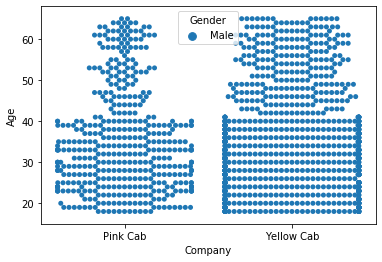

In [35]:
sns.swarmplot(y=fm['Age'],x='Company',data=fm,hue='Gender',orient='Income (USD/Month)')
plt.show()

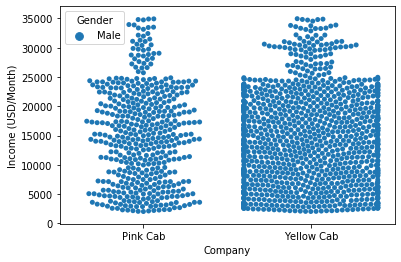

In [36]:
sns.swarmplot(y=fm['Income (USD/Month)'],x='Company',data=fm,hue='Gender')
plt.show()

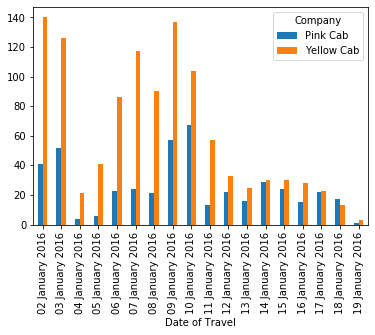

In [37]:
pd.crosstab(fm['Date of Travel'],fm['Company']).plot(kind='bar')
plt.show()

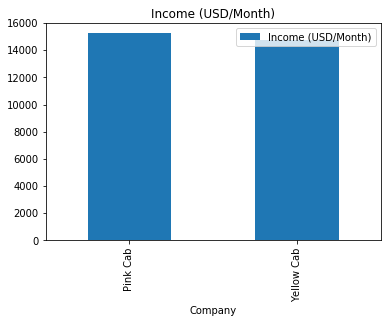

In [38]:
fm[['Company','Income (USD/Month)']].groupby('Company').mean().plot(kind='bar',subplots=True)
plt.show()

In [39]:
fm.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'price charged per km', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'profit percentage per trip'],
      dtype='object')

## realtionship between dependent and independent variable

### 1.Now we will see if choice of cab  is affected by price charged

In [40]:
fm.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'price charged per km', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'profit percentage per trip'],
      dtype='object')

In [41]:
fm.groupby('Company')['Price Charged'].count()

Company
Pink Cab       454
Yellow Cab    1104
Name: Price Charged, dtype: int64

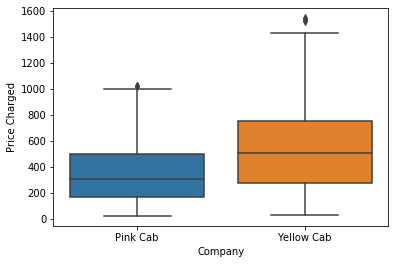

In [42]:
sns.boxplot('Company','Price Charged',data=fm)
plt.show()

In [43]:
yellow  = fm[fm['Company']=='Yellow Cab']['Price Charged']

In [44]:
pink = fm[fm['Company']=='Pink Cab']['Price Charged']

In [45]:
import scipy.stats as st
st.f_oneway(yellow,pink)

F_onewayResult(statistic=139.32704865699694, pvalue=7.407338934203437e-31)

## 2.Now we will see if choice of cab is affected by 'cost of per km charge'

### Comparing cost

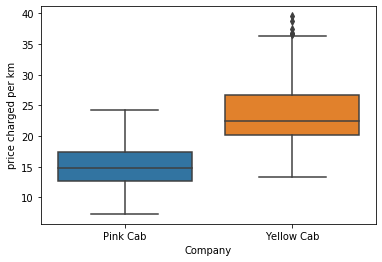

In [46]:
sns.boxplot('Company','price charged per km',data=fm)
plt.show()

### checking if demand of cab company is effected by per km charge with 5% confidence interval

In [47]:
yellow  = fm[fm['Company']=='Yellow Cab']['price charged per km']

In [48]:
pink  = fm[fm['Company']=='Pink Cab']['price charged per km']

In [49]:
st.f_oneway(yellow,pink)

F_onewayResult(statistic=1179.9530554356484, pvalue=6.325003496864589e-193)

## Now we will see if choice of cab is affected by 'Income (USD/Month)'

### Comparing income

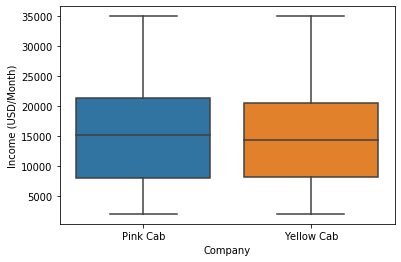

In [50]:
sns.boxplot('Company','Income (USD/Month)',data=fm)
plt.show()

### checking if demand of cab company is effected by Income (USD/Month) with 5% confidence interval

In [51]:
yellow  = fm[fm['Company']=='Yellow Cab']['Income (USD/Month)']

In [52]:
Pink  = fm[fm['Company']=='Pink Cab']['Income (USD/Month)']

In [53]:
st.f_oneway(yellow,Pink)

F_onewayResult(statistic=1.357484130525554, pvalue=0.24415256206889818)

## Now we will see if choice of cab is affected by 'City' with 5% confidence interval

In [54]:
city = pd.crosstab(fm['City'],fm['Company'])
city

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


In [55]:
arrcity = np.array([[14,42],[4,10],[29,116],[60,358],[12,28],[7,7],[104,108],[6,5],[5,2],[52,201],[9,6],[5,4]
                    ,[2,2],[6,4],[58,41],[31,24],[22,15],[4,3],[24,128]])
arrcity

array([[ 14,  42],
       [  4,  10],
       [ 29, 116],
       [ 60, 358],
       [ 12,  28],
       [  7,   7],
       [104, 108],
       [  6,   5],
       [  5,   2],
       [ 52, 201],
       [  9,   6],
       [  5,   4],
       [  2,   2],
       [  6,   4],
       [ 58,  41],
       [ 31,  24],
       [ 22,  15],
       [  4,   3],
       [ 24, 128]])

In [56]:
st.chi2_contingency(arrcity)

(221.79446692547936,
 4.207113856896185e-37,
 18,
 array([[ 16.31835687,  39.68164313],
        [  4.07958922,   9.92041078],
        [ 42.25288832, 102.74711168],
        [121.80487805, 296.19512195],
        [ 11.65596919,  28.34403081],
        [  4.07958922,   9.92041078],
        [ 61.77663671, 150.22336329],
        [  3.20539153,   7.79460847],
        [  2.03979461,   4.96020539],
        [ 73.72400513, 179.27599487],
        [  4.37098845,  10.62901155],
        [  2.62259307,   6.37740693],
        [  1.16559692,   2.83440308],
        [  2.9139923 ,   7.0860077 ],
        [ 28.84852375,  70.15147625],
        [ 16.02695764,  38.97304236],
        [ 10.7817715 ,  26.2182285 ],
        [  2.03979461,   4.96020539],
        [ 44.29268293, 107.70731707]]))

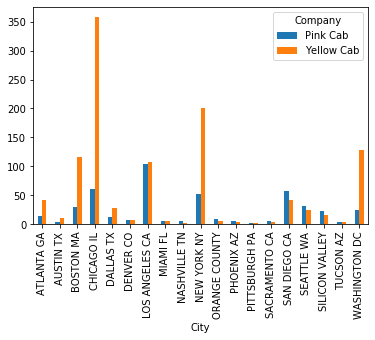

In [57]:
pd.crosstab(fm['City'],fm['Company']).plot(kind='bar')
plt.show()

## checking if demand of cab company is effected by 'Date of Travel'  with 5% confidence interval

In [58]:
a = pd.crosstab(fm['Date of Travel'],fm['Company'])
a

Company,Pink Cab,Yellow Cab
Date of Travel,,
02 January 2016,41,140
03 January 2016,52,126
04 January 2016,4,21
05 January 2016,6,41
06 January 2016,23,86
07 January 2016,24,117
08 January 2016,21,90
09 January 2016,57,137
10 January 2016,67,104


In [59]:
datearr = np.array([[41,140],[52,126],[4,21],[6,41],[23,86],[24,117],[21,90],[57,137],[67,104],[13,57],[22,33]
                    ,[16,25],[29,30],[24,30],[15,28],[22,23],[17,13],[1,3]]).reshape(6,6)
datearr


array([[ 41, 140,  52, 126,   4,  21],
       [  6,  41,  23,  86,  24, 117],
       [ 21,  90,  57, 137,  67, 104],
       [ 13,  57,  22,  33,  16,  25],
       [ 29,  30,  24,  30,  15,  28],
       [ 22,  23,  17,  13,   1,   3]])

In [60]:
st.chi2_contingency(datearr)

(323.0400981924664,
 1.3898650769012135e-53,
 25,
 array([[ 32.53401797,  93.90500642,  48.06161746, 104.74967908,
          31.30166881,  73.44801027],
        [ 25.16302953,  72.6296534 ,  37.17265725,  81.01732991,
          24.20988447,  56.80744544],
        [ 40.32862644, 116.40308087,  59.57637997, 129.84595635,
          38.80102696,  91.0449294 ],
        [ 14.06418485,  40.59435173,  20.77663671,  45.28241335,
          13.53145058,  31.75096277],
        [ 13.2169448 ,  38.14890886,  19.52503209,  42.55455712,
          12.71630295,  29.83825417],
        [  6.69319641,  19.31899872,   9.88767651,  21.55006418,
           6.43966624,  15.11039795]]))

### Which company has maximum cab users at a particular time period?

In [61]:
(fm.groupby('Date of Travel')['Company'].value_counts())[0:1]

Date of Travel   Company   
02 January 2016  Yellow Cab    140
Name: Company, dtype: int64

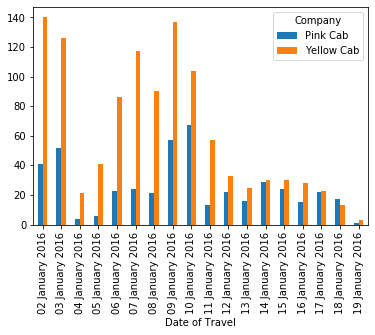

In [62]:
pd.crosstab(fm['Date of Travel'],fm['Company']).plot(kind='bar')
plt.show()

##  Does margin proportionally increase with increase in number of customers?

In [63]:
yellow.columns

AttributeError: 'Series' object has no attribute 'columns'

In [64]:
a = pd.crosstab(fm['Date of Travel'],fm['Company'],margins = True)
a

Company,Pink Cab,Yellow Cab,All
Date of Travel,,,
02 January 2016,41,140,181
03 January 2016,52,126,178
04 January 2016,4,21,25
05 January 2016,6,41,47
06 January 2016,23,86,109
07 January 2016,24,117,141
08 January 2016,21,90,111
09 January 2016,57,137,194
10 January 2016,67,104,171


In [65]:
b = pd.crosstab(fm['Date of Travel'],fm['Company'],normalize = 'index')
b

Company,Pink Cab,Yellow Cab
Date of Travel,,
02 January 2016,0.226519,0.773481
03 January 2016,0.292135,0.707865
04 January 2016,0.160000,0.840000
05 January 2016,0.127660,0.872340
06 January 2016,0.211009,0.788991
07 January 2016,0.170213,0.829787
08 January 2016,0.189189,0.810811
09 January 2016,0.293814,0.706186
10 January 2016,0.391813,0.608187


In [66]:
main = pd.merge(a,b,how='inner',on='Date of Travel')
main

Company,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y
Date of Travel,,,,,
02 January 2016,41,140,181,0.226519,0.773481
03 January 2016,52,126,178,0.292135,0.707865
04 January 2016,4,21,25,0.160000,0.840000
05 January 2016,6,41,47,0.127660,0.872340
06 January 2016,23,86,109,0.211009,0.788991
07 January 2016,24,117,141,0.170213,0.829787
08 January 2016,21,90,111,0.189189,0.810811
09 January 2016,57,137,194,0.293814,0.706186
10 January 2016,67,104,171,0.391813,0.608187


In [67]:
main['All'] = main['All'].astype(str)

## creating hypothesis for checking if margin proportionally increase with increase in number of customers for yellow cab and pink cab one by one

### pink cab table

In [68]:
pink = fm[fm['Company']=='Pink Cab']

In [69]:
pink

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,price charged per km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit percentage per trip
0,10000011,08 January 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,12.182266,29290,Card,Male,28,10813,18.27
1,10000012,06 January 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,12.526904,27703,Card,Male,27,9237,7.07
2,10000013,02 January 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,13.849558,28712,Cash,Male,53,11242,28.24
3,10000014,07 January 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,11.377751,28020,Cash,Male,23,23327,7.34
4,10000015,03 January 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,13.129439,27182,Card,Male,33,8536,17.23
5,10000016,07 January 2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024,11.952145,27318,Cash,Male,25,13984,14.92
6,10000017,03 January 2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200,13.094318,33788,Card,Male,23,23788,21.24
7,10000018,07 January 2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890,13.074334,34106,Card,Male,19,19980,23.34
8,10000019,12 January 2016,Pink Cab,BOSTON MA,14.40,191.61,146.880,13.306250,59799,Cash,Male,33,19271,30.45
9,10000020,06 January 2016,Pink Cab,BOSTON MA,10.89,156.98,113.256,14.415060,57982,Cash,Male,57,5068,38.61


In [70]:
jan2p = pink[pink['Date of Travel']=='02 January 2016']['profit percentage per trip']
jan3p = pink[pink['Date of Travel']=='03 January 2016']['profit percentage per trip']
jan4p = pink[pink['Date of Travel']=='04 January 2016']['profit percentage per trip']
jan5p = pink[pink['Date of Travel']=='05 January 2016']['profit percentage per trip']
jan6p = pink[pink['Date of Travel']=='06 January 2016']['profit percentage per trip']
jan7p = pink[pink['Date of Travel']=='07 January 2016']['profit percentage per trip']
jan8p = pink[pink['Date of Travel']=='08 January 2016']['profit percentage per trip']
jan9p = pink[pink['Date of Travel']=='09 January 2016']['profit percentage per trip']
jan10p = pink[pink['Date of Travel']=='10 January 2016']['profit percentage per trip']
jan11p = pink[pink['Date of Travel']=='11 January 2016']['profit percentage per trip']
jan12p = pink[pink['Date of Travel']=='12 January 2016']['profit percentage per trip']
jan13p = pink[pink['Date of Travel']=='13 January 2016']['profit percentage per trip']
jan14p= pink[pink['Date of Travel']=='14 January 2016']['profit percentage per trip']
jan15p = pink[pink['Date of Travel']=='15 January 2016']['profit percentage per trip']
jan16p = pink[pink['Date of Travel']=='16 January 2016']['profit percentage per trip']
jan17p = pink[pink['Date of Travel']=='17 January 2016']['profit percentage per trip']
jan18p = pink[pink['Date of Travel']=='18 January 2016']['profit percentage per trip']
jan19p = pink[pink['Date of Travel']=='19 January 2016']['profit percentage per trip']

In [71]:
import scipy.stats as st
st.f_oneway(jan2p,jan3p,jan4p,jan5p,jan6p,jan7p,jan8p,jan9p,jan10p,jan11p,jan12p,jan13p,jan14p,jan15p,jan16p,jan17p,jan18p,jan19p)

F_onewayResult(statistic=7.842074446748407, pvalue=3.2902897178067163e-17)

In [116]:
l = final['Pink Cab_x'].astype(float)
l

02 January 2016    41.0
03 January 2016    52.0
04 January 2016     4.0
05 January 2016     6.0
06 January 2016    23.0
07 January 2016    24.0
08 January 2016    21.0
09 January 2016    57.0
10 January 2016    67.0
11 January 2016    13.0
12 January 2016    22.0
13 January 2016    16.0
14 January 2016    29.0
15 January 2016    24.0
16 January 2016    15.0
17 January 2016    22.0
18 January 2016    17.0
19 January 2016     1.0
Name: Pink Cab_x, dtype: float64

In [112]:
list(np.array(pink_cab_profit))

['71.17',
 '23.28',
 '42.77',
 '29.37',
 '38.89',
 '52.54',
 '15.77',
 '18.90',
 '42.78',
 '23.54',
 '42.12',
 '-6.31',
 '19.64',
 '18.75',
 '18.93',
 '41.37',
 '18.63',
 '48.98']

In [110]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 02 January 2016 to 19 January 2016
Data columns (total 7 columns):
Pink Cab_x           18 non-null int64
Yellow Cab_x         18 non-null int64
All                  18 non-null object
Pink Cab_y           18 non-null float64
Yellow Cab_y         18 non-null float64
yellow_cab_profit    18 non-null float64
pink_cab_profit      18 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ KB


In [72]:
np.mean(pink[pink['Date of Travel']==42372]['profit percentage per trip'])

nan

In [73]:
a = list(set(pink['Date of Travel']))
a

['03 January 2016',
 '12 January 2016',
 '05 January 2016',
 '16 January 2016',
 '06 January 2016',
 '04 January 2016',
 '15 January 2016',
 '18 January 2016',
 '09 January 2016',
 '07 January 2016',
 '10 January 2016',
 '19 January 2016',
 '14 January 2016',
 '11 January 2016',
 '13 January 2016',
 '08 January 2016',
 '17 January 2016',
 '02 January 2016']

In [74]:
#finding mean percentage of pink cab on daily basis
# for i in a:
#     print(("{0:.2f}".format(np.mean(pink[pink['Date of Travel']==i]['profit percentage per trip']))))
    
pink_cab_profit=[("{0:.2f}".format(np.mean(pink[pink['Date of Travel']==i]['profit percentage per trip'])))  for i in a ]
pink_cab_profit    
        

    
        
            
            
            
    

                        
            

    
        
    

['71.17',
 '23.28',
 '42.77',
 '29.37',
 '38.89',
 '52.54',
 '15.77',
 '18.90',
 '42.78',
 '23.54',
 '42.12',
 '-6.31',
 '19.64',
 '18.75',
 '18.93',
 '41.37',
 '18.63',
 '48.98']

In [75]:
list(np.array(pink_cab_profit))

['71.17',
 '23.28',
 '42.77',
 '29.37',
 '38.89',
 '52.54',
 '15.77',
 '18.90',
 '42.78',
 '23.54',
 '42.12',
 '-6.31',
 '19.64',
 '18.75',
 '18.93',
 '41.37',
 '18.63',
 '48.98']

In [76]:
p = pd.DataFrame({'pink_cab_profit':list(pink_cab_profit)},index = a)
p

,pink_cab_profit
03 January 2016,71.17
12 January 2016,23.28
05 January 2016,42.77
16 January 2016,29.37
06 January 2016,38.89
04 January 2016,52.54
15 January 2016,15.77
18 January 2016,18.90
09 January 2016,42.78
07 January 2016,23.54


In [77]:
p.sort_values('pink_cab_profit')

,pink_cab_profit
19 January 2016,-6.31
15 January 2016,15.77
17 January 2016,18.63
11 January 2016,18.75
18 January 2016,18.90
13 January 2016,18.93
14 January 2016,19.64
12 January 2016,23.28
07 January 2016,23.54
16 January 2016,29.37


## yellow cab table

In [78]:
yellow = fm[fm['Company']=='Yellow Cab']
yellow

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,price charged per km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit percentage per trip
22,10001809,17 January 2016,Yellow Cab,BOSTON MA,27.54,438.01,337.0896,15.904503,57200,Cash,Male,23,3268,29.94
25,10001838,09 January 2016,Yellow Cab,CHICAGO IL,6.48,150.60,90.2016,23.240741,3077,Card,Male,22,16759,66.96
27,10000624,08 January 2016,Yellow Cab,CHICAGO IL,24.64,540.84,304.5504,21.949675,4734,Card,Male,33,30608,77.59
35,10001941,10 January 2016,Yellow Cab,CHICAGO IL,38.40,846.70,465.4080,22.049479,5777,Card,Male,24,28850,81.93
48,10002006,17 January 2016,Yellow Cab,CHICAGO IL,39.27,771.77,490.0896,19.652916,5029,Card,Male,53,3015,57.48
79,10000743,02 January 2016,Yellow Cab,LOS ANGELES CA,4.56,113.97,62.9280,24.993421,8702,Card,Male,20,3795,81.11
241,10000384,02 January 2016,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,39.527557,27602,Card,Male,23,8542,188.94
242,10000385,09 January 2016,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,33.477003,27594,Cash,Male,28,3901,173.50
243,10000386,03 January 2016,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,34.398113,27884,Cash,Male,32,13505,175.63
244,10000387,06 January 2016,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,31.327103,28533,Cash,Male,39,28386,151.02


In [79]:
jan2 = yellow[yellow['Date of Travel']=='02 January 2016']['profit percentage per trip']
jan3 = yellow[yellow['Date of Travel']=='03 January 2016']['profit percentage per trip']
jan4 = yellow[yellow['Date of Travel']=='04 January 2016']['profit percentage per trip']
jan5 = yellow[yellow['Date of Travel']=='05 January 2016']['profit percentage per trip']
jan6 = yellow[yellow['Date of Travel']=='06 January 2016']['profit percentage per trip']
jan7 = yellow[yellow['Date of Travel']=='07 January 2016']['profit percentage per trip']
jan8 = yellow[yellow['Date of Travel']=='08 January 2016']['profit percentage per trip']
jan9 = yellow[yellow['Date of Travel']=='09 January 2016']['profit percentage per trip']
jan10 = yellow[yellow['Date of Travel']=='10 January 2016']['profit percentage per trip']
jan11 = yellow[yellow['Date of Travel']=='11 January 2016']['profit percentage per trip']
jan12 = yellow[yellow['Date of Travel']=='12 January 2016']['profit percentage per trip']
jan13 = yellow[yellow['Date of Travel']=='13 January 2016']['profit percentage per trip']
jan14= yellow[yellow['Date of Travel']=='14 January 2016']['profit percentage per trip']
jan15 = yellow[yellow['Date of Travel']=='15 January 2016']['profit percentage per trip']
jan16 = yellow[yellow['Date of Travel']=='16 January 2016']['profit percentage per trip']
jan17 = yellow[yellow['Date of Travel']=='17 January 2016']['profit percentage per trip']
jan18 = yellow[yellow['Date of Travel']=='18 January 2016']['profit percentage per trip']
jan19 = yellow[yellow['Date of Travel']=='19 January 2016']['profit percentage per trip']

In [80]:
import scipy.stats as st
st.f_oneway(jan2,jan3,jan4,jan5,jan6,jan7,jan8,jan9,jan10,jan11,jan12,jan13,jan14,jan15,jan16,jan17,jan18,jan19)

F_onewayResult(statistic=18.878808213203598, pvalue=3.450600521284136e-50)

In [81]:
b = list(set(yellow['Date of Travel']))
b


['03 January 2016',
 '05 January 2016',
 '12 January 2016',
 '16 January 2016',
 '06 January 2016',
 '04 January 2016',
 '15 January 2016',
 '18 January 2016',
 '09 January 2016',
 '07 January 2016',
 '10 January 2016',
 '19 January 2016',
 '14 January 2016',
 '11 January 2016',
 '13 January 2016',
 '08 January 2016',
 '17 January 2016',
 '02 January 2016']

In [82]:
# for j in b:
#     print("{0:.2f}".format(np.mean(yellow[yellow['Date of Travel']==j]['profit percentage per trip'])))
    
yellow_cab_profit = [np.mean(yellow[yellow['Date of Travel']==j]['profit percentage per trip']) for j in b]
yellow_cab_profit

[101.73269841269844,
 80.81926829268293,
 63.48272727272727,
 49.44071428571429,
 75.39151162790695,
 68.15619047619046,
 44.41833333333333,
 48.44384615384615,
 75.69927007299269,
 76.02538461538461,
 72.67875000000001,
 21.7,
 47.25833333333334,
 67.17508771929822,
 47.626000000000005,
 81.27833333333332,
 50.24826086956522,
 104.22499999999998]

In [83]:
np.mean(yellow[yellow['Date of Travel']==42388]['profit percentage per trip'])

nan

In [84]:
y=pd.DataFrame({'yellow_cab_profit':list(yellow_cab_profit)},index=b)
y

,yellow_cab_profit
03 January 2016,101.732698
05 January 2016,80.819268
12 January 2016,63.482727
16 January 2016,49.440714
06 January 2016,75.391512
04 January 2016,68.156190
15 January 2016,44.418333
18 January 2016,48.443846
09 January 2016,75.699270
07 January 2016,76.025385


### merging main ,y and p table to plot the margin relationship

In [85]:
final = pd.concat([main,y,p],join='inner',axis=1)
final

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
02 January 2016,41,140,181,0.226519,0.773481,104.225000,48.98
03 January 2016,52,126,178,0.292135,0.707865,101.732698,71.17
04 January 2016,4,21,25,0.160000,0.840000,68.156190,52.54
05 January 2016,6,41,47,0.127660,0.872340,80.819268,42.77
06 January 2016,23,86,109,0.211009,0.788991,75.391512,38.89
07 January 2016,24,117,141,0.170213,0.829787,76.025385,23.54
08 January 2016,21,90,111,0.189189,0.810811,81.278333,41.37
09 January 2016,57,137,194,0.293814,0.706186,75.699270,42.78
10 January 2016,67,104,171,0.391813,0.608187,72.678750,42.12
11 January 2016,13,57,70,0.185714,0.814286,67.175088,18.75


In [86]:
final.columns

Index(['Pink Cab_x', 'Yellow Cab_x', 'All', 'Pink Cab_y', 'Yellow Cab_y',
       'yellow_cab_profit', 'pink_cab_profit'],
      dtype='object')

### Ploting relationship between profit margin and number of booking for yellow cab 

In [87]:
a1 = final.sort_values('Yellow Cab_x')
a1

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
19 January 2016,1,3,4,0.250000,0.750000,21.700000,-6.31
18 January 2016,17,13,30,0.566667,0.433333,48.443846,18.90
04 January 2016,4,21,25,0.160000,0.840000,68.156190,52.54
17 January 2016,22,23,45,0.488889,0.511111,50.248261,18.63
13 January 2016,16,25,41,0.390244,0.609756,47.626000,18.93
16 January 2016,15,28,43,0.348837,0.651163,49.440714,29.37
15 January 2016,24,30,54,0.444444,0.555556,44.418333,15.77
14 January 2016,29,30,59,0.491525,0.508475,47.258333,19.64
12 January 2016,22,33,55,0.400000,0.600000,63.482727,23.28
05 January 2016,6,41,47,0.127660,0.872340,80.819268,42.77


In [88]:
a2 = final.sort_values('yellow_cab_profit',kind='mergesort')
a2

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
19 January 2016,1,3,4,0.250000,0.750000,21.700000,-6.31
15 January 2016,24,30,54,0.444444,0.555556,44.418333,15.77
14 January 2016,29,30,59,0.491525,0.508475,47.258333,19.64
13 January 2016,16,25,41,0.390244,0.609756,47.626000,18.93
18 January 2016,17,13,30,0.566667,0.433333,48.443846,18.90
16 January 2016,15,28,43,0.348837,0.651163,49.440714,29.37
17 January 2016,22,23,45,0.488889,0.511111,50.248261,18.63
12 January 2016,22,33,55,0.400000,0.600000,63.482727,23.28
11 January 2016,13,57,70,0.185714,0.814286,67.175088,18.75
04 January 2016,4,21,25,0.160000,0.840000,68.156190,52.54


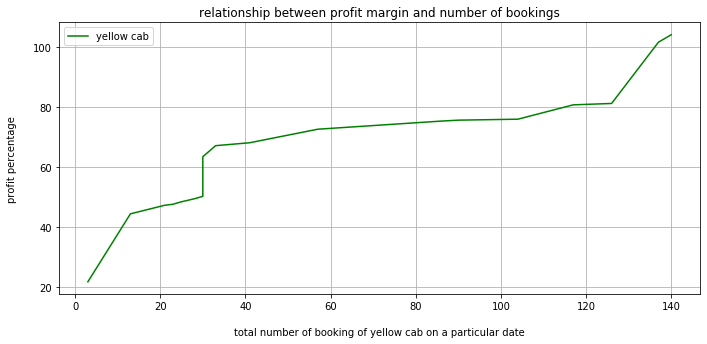

In [89]:

fig ,ax =plt.subplots(1,1,figsize =(11.5,5))
x = a1['Yellow Cab_x']
z = a2['yellow_cab_profit']
plt.plot(x,z,color='green',label='yellow cab')
plt.title('relationship between profit margin and number of bookings')
plt.xlabel('\ntotal number of booking of yellow cab on a particular date')
plt.ylabel('profit percentage\n')
plt.grid()
plt.legend()
plt.show()

In [90]:
#Conclusion:For yellow cab margin is increasing proportionally with increase in number of customers

In [91]:
b1=final.sort_values('Pink Cab_x')
b1

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
19 January 2016,1,3,4,0.250000,0.750000,21.700000,-6.31
04 January 2016,4,21,25,0.160000,0.840000,68.156190,52.54
05 January 2016,6,41,47,0.127660,0.872340,80.819268,42.77
11 January 2016,13,57,70,0.185714,0.814286,67.175088,18.75
16 January 2016,15,28,43,0.348837,0.651163,49.440714,29.37
13 January 2016,16,25,41,0.390244,0.609756,47.626000,18.93
18 January 2016,17,13,30,0.566667,0.433333,48.443846,18.90
08 January 2016,21,90,111,0.189189,0.810811,81.278333,41.37
17 January 2016,22,23,45,0.488889,0.511111,50.248261,18.63
12 January 2016,22,33,55,0.400000,0.600000,63.482727,23.28


In [92]:
b2=final.sort_values('pink_cab_profit')
b2

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
19 January 2016,1,3,4,0.250000,0.750000,21.700000,-6.31
15 January 2016,24,30,54,0.444444,0.555556,44.418333,15.77
17 January 2016,22,23,45,0.488889,0.511111,50.248261,18.63
11 January 2016,13,57,70,0.185714,0.814286,67.175088,18.75
18 January 2016,17,13,30,0.566667,0.433333,48.443846,18.90
13 January 2016,16,25,41,0.390244,0.609756,47.626000,18.93
14 January 2016,29,30,59,0.491525,0.508475,47.258333,19.64
12 January 2016,22,33,55,0.400000,0.600000,63.482727,23.28
07 January 2016,24,117,141,0.170213,0.829787,76.025385,23.54
16 January 2016,15,28,43,0.348837,0.651163,49.440714,29.37


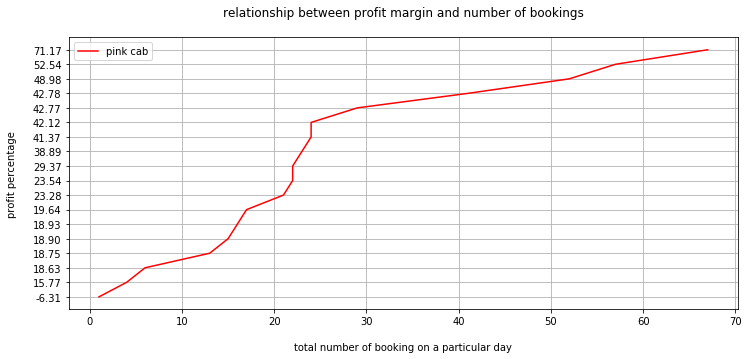

In [93]:
fig ,ax =plt.subplots(1,1,figsize =(12,5))
x = b1['Pink Cab_x']
z = b2['pink_cab_profit']
plt.plot(x,z,color='red',label='pink cab')
plt.title('relationship between profit margin and number of bookings\n')
plt.xlabel('\ntotal number of booking on a particular day')
plt.ylabel('profit percentage\n')
plt.grid()
plt.legend()
plt.show()

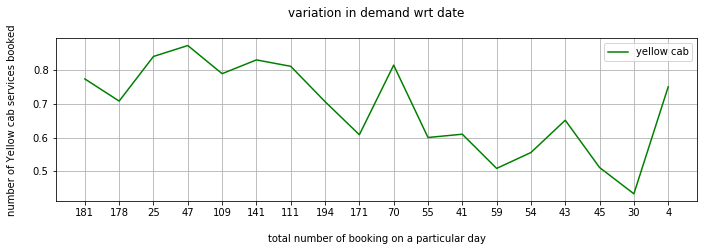

In [94]:
fig ,ax =plt.subplots(1,1,figsize =(11.5,3))
x = main['All']
z = main['Yellow Cab_y']
plt.plot(x,z,color='green',label='yellow cab')
plt.title('variation in demand wrt date\n ')
plt.xlabel('\ntotal number of booking on a particular day')
plt.ylabel('number of Yellow cab services booked\n')
plt.grid()
plt.legend()
plt.show()

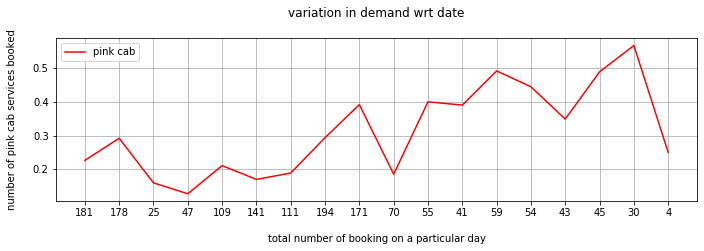

In [95]:
fig ,ax =plt.subplots(1,1,figsize =(11.5,3))
x = main['All']
z = main['Pink Cab_y']
plt.plot(x,z,color='red',label='pink cab')
plt.title('variation in demand wrt date\n')
plt.xlabel('\ntotal number of booking on a particular day')
plt.ylabel('number of pink cab services booked\n')
plt.grid()
plt.legend()
plt.show()

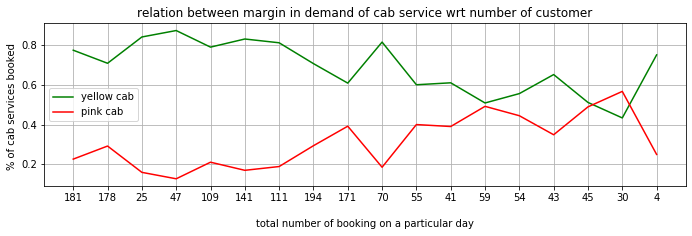

In [96]:
fig ,ax =plt.subplots(1,1,figsize =(11.5,3))
x = main['All']
y = main['Yellow Cab_y']
z = main['Pink Cab_y']
plt.plot(x,y,color='green',label = 'yellow cab')
plt.plot(x,z,color='red',label='pink cab')
plt.title('relation between margin in demand of cab service wrt number of customer')
plt.xlabel('\ntotal number of booking on a particular day')
plt.ylabel('% of cab services booked ')
plt.grid()
plt.legend()
plt.show()




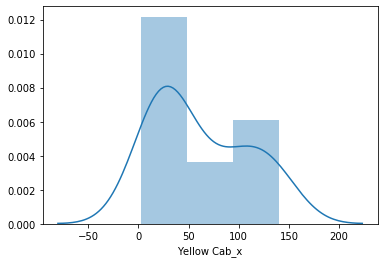

In [97]:
sns.distplot(final['Yellow Cab_x'])
plt.show()

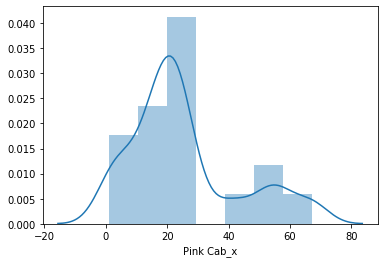

In [98]:
sns.distplot(final['Pink Cab_x'])
plt.show()

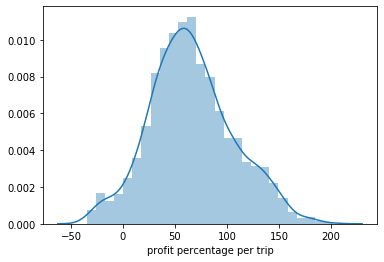

In [99]:
sns.distplot(fm['profit percentage per trip'])
plt.show()

In [100]:
final

,Pink Cab_x,Yellow Cab_x,All,Pink Cab_y,Yellow Cab_y,yellow_cab_profit,pink_cab_profit
02 January 2016,41,140,181,0.226519,0.773481,104.225000,48.98
03 January 2016,52,126,178,0.292135,0.707865,101.732698,71.17
04 January 2016,4,21,25,0.160000,0.840000,68.156190,52.54
05 January 2016,6,41,47,0.127660,0.872340,80.819268,42.77
06 January 2016,23,86,109,0.211009,0.788991,75.391512,38.89
07 January 2016,24,117,141,0.170213,0.829787,76.025385,23.54
08 January 2016,21,90,111,0.189189,0.810811,81.278333,41.37
09 January 2016,57,137,194,0.293814,0.706186,75.699270,42.78
10 January 2016,67,104,171,0.391813,0.608187,72.678750,42.12
11 January 2016,13,57,70,0.185714,0.814286,67.175088,18.75
